<h2><center><strong>MONDRAGON UNIBERSITATEA</strong></center></h2>
<center><h2><strong>Goi Eskola Politeknikoa</strong></h2></center>
<center><h3><strong>Fundamentos del Aprendizaje Automático</strong></h3></center>
<center><img src="res/logo.png" width="150"/></center>

* __Author__ = @G30v4
* __Date__ = 22-10-2023
* __Title__ = Validación de Modelos
* __Version__ = 1.0

## Objetivos :
- Investigar la lógica matemática del algoritmo de validación cruzada 
- Implementar el algoritmo de validación cruzada
- Implementar el algoritmo de GridSearch
- Buscar los mejores parámetros para el clasificador RandomForest con el algoritmo GridSearch
- Evaluar el algoritmo con el de la librería scikit-learn

In [101]:
# install dependencies
!pip install scikit-learn numpy pandas matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


# 1. Lectura del data set

In [141]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [105]:
dt = datasets.load_iris()
dt

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [106]:
print(f"Dimension de los datos de entrenaminoento: {dt.data.shape}")
print(f"Dimension de los datos a predecir: {dt.target.shape}")

Dimension de los datos de entrenaminoento: (150, 4)
Dimension de los datos a predecir: (150,)


# 1. Cross Validation

## 1.1. Evaluación del clasificador con nuestro CrossValitator

In [116]:
# load own library
from CrossValidator import CrossValidator

# create RandomForestClassifier instance
rf_classifier = RandomForestClassifier()

# set folds number
FOLDS = 10

# create own CrossValitator instance
cv = CrossValidator(dt, FOLDS, rf_classifier)
cv

In [117]:
# recover folds generated
train, validation = cv.get_folds()

# visualizade folds iterations
for idx, t in enumerate(train):
    print(f"train: \n {t}, \n validation: \n {validation[idx]} \n\n")

train: 
 [[6.1 2.6 5.6 1.4 2. ]
 [5.8 2.6 4.  1.2 1. ]
 [6.  2.7 5.1 1.6 1. ]
 [5.9 3.  4.2 1.5 1. ]
 [6.7 3.1 4.4 1.4 1. ]
 [6.  2.2 4.  1.  1. ]
 [6.4 2.8 5.6 2.2 2. ]
 [4.9 3.1 1.5 0.1 0. ]
 [7.7 3.  6.1 2.3 2. ]
 [7.7 2.6 6.9 2.3 2. ]
 [4.4 3.2 1.3 0.2 0. ]
 [5.5 2.4 3.7 1.  1. ]
 [5.8 2.7 4.1 1.  1. ]
 [5.2 3.5 1.5 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [6.9 3.2 5.7 2.3 2. ]
 [6.5 3.  5.8 2.2 2. ]
 [4.5 2.3 1.3 0.3 0. ]
 [5.1 3.3 1.7 0.5 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.9 3.  5.1 1.8 2. ]
 [5.5 2.4 3.8 1.1 1. ]
 [6.3 3.4 5.6 2.4 2. ]
 [5.5 3.5 1.3 0.2 0. ]
 [7.6 3.  6.6 2.1 2. ]
 [5.  2.3 3.3 1.  1. ]
 [5.  3.6 1.4 0.2 0. ]
 [7.2 3.2 6.  1.8 2. ]
 [4.9 2.4 3.3 1.  1. ]
 [6.7 3.  5.  1.7 1. ]
 [5.1 3.4 1.5 0.2 0. ]
 [6.3 2.5 5.  1.9 2. ]
 [6.6 3.  4.4 1.4 1. ]
 [6.3 2.5 4.9 1.5 1. ]
 [4.8 3.4 1.9 0.2 0. ]
 [5.7 2.8 4.1 1.3 1. ]
 [6.3 2.7 4.9 1.8 2. ]
 [7.1 3.  5.9 2.1 2. ]
 [5.1 3.7 1.5 0.4 0. ]
 [6.5 3.  5.5 1.8 2. ]
 [6.4 2.9 4.3 1.3 1. ]
 [5.  3.4 1.6 0.4 0. ]
 [5.7 2.5 5.  2.  2. ]
 [

In [118]:
m,sd = cv.crossValidate()
print(f"\nResult of CrossValidation : \nMean: {m:.2f}, STD: {sd:.2f}")

Iteration 1 with score : 1.000
Iteration 2 with score : 1.000
Iteration 3 with score : 1.000
Iteration 4 with score : 0.867
Iteration 5 with score : 1.000
Iteration 6 with score : 1.000
Iteration 7 with score : 1.000
Iteration 8 with score : 0.867
Iteration 9 with score : 0.867
Iteration 10 with score : 0.933

Result of CrossValidation : 
Mean: 0.95, STD: 0.06


In [144]:
# evaluate with various folds [2, 5,10,15,20,25,30]
array_folds = [2, 5,10,15,20,25,30]

# comparatives acumulator
df_acum = pd.DataFrame(columns=['Model', 'iteration', 'mean', 'std'])


for i, f in enumerate(array_folds):
    print(f"\nResult of CrossValidation {i+1} with FOLDS: {f} :\n")
    cv = CrossValidator(dt, f, rf_classifier)
    m,sd = cv.crossValidate()
    #df_acum = df_acum.append(, ignore_index=True)
    df_acum.loc[len(df_acum)] = {
                'Model': "Own",
                'iteration': i+1,
                'mean': m,
                'std': sd
            }
    print(f"\n Mean: {m:.2f}, STD: {sd:.2f}\n\n")


Result of CrossValidation 1 with FOLDS: 2 :

Iteration 1 with score : 0.947
Iteration 2 with score : 0.907

 Mean: 0.93, STD: 0.02



Result of CrossValidation 2 with FOLDS: 5 :

Iteration 1 with score : 0.967
Iteration 2 with score : 0.967
Iteration 3 with score : 0.867
Iteration 4 with score : 0.933
Iteration 5 with score : 0.967

 Mean: 0.94, STD: 0.04



Result of CrossValidation 3 with FOLDS: 10 :

Iteration 1 with score : 1.000
Iteration 2 with score : 0.933
Iteration 3 with score : 1.000
Iteration 4 with score : 1.000
Iteration 5 with score : 0.933
Iteration 6 with score : 0.933
Iteration 7 with score : 0.933
Iteration 8 with score : 1.000
Iteration 9 with score : 1.000
Iteration 10 with score : 0.800

 Mean: 0.95, STD: 0.06



Result of CrossValidation 4 with FOLDS: 15 :

Iteration 1 with score : 1.000
Iteration 2 with score : 1.000
Iteration 3 with score : 0.900
Iteration 4 with score : 1.000
Iteration 5 with score : 1.000
Iteration 6 with score : 1.000
Iteration 7 with score

## 1.2. Comparacion de nuestro algoritmo con el propio de sklearn 

In [142]:
# import cross validator score from sklearn
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score

# extract dataset with cross valitator format
X, y = datasets.load_iris(return_X_y=True)

print(f"Dimentions: \n {X.shape}, {y.shape}\n")

# show sample
print(f"Data sample: \n {X[:5]} \n\nTarget sample:\n {y[:5]}")


Dimentions: 
 (150, 4), (150,)

Data sample: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]] 

Target sample:
 [0 0 0 0 0]


In [131]:
# check folds with sklearn
kf = KFold(n_splits=FOLDS)
for train, test in kf.split(X, y):
    print('train -  {}   |   test -  {}'.format(np.bincount(y[train]), np.bincount(y[test])))

train -  [35 50 50]   |   test -  [15]
train -  [35 50 50]   |   test -  [15]
train -  [35 50 50]   |   test -  [15]
train -  [45 40 50]   |   test -  [ 5 10]
train -  [50 35 50]   |   test -  [ 0 15]
train -  [50 35 50]   |   test -  [ 0 15]
train -  [50 40 45]   |   test -  [ 0 10  5]
train -  [50 50 35]   |   test -  [ 0  0 15]
train -  [50 50 35]   |   test -  [ 0  0 15]
train -  [50 50 35]   |   test -  [ 0  0 15]


In [132]:
# check folds with sklearn using Stratified algorithm
skf = StratifiedKFold(n_splits=FOLDS)
for train, test in skf.split(X, y):
    print('train -  {}   |   test -  {}'.format(np.bincount(y[train]), np.bincount(y[test])))

train -  [45 45 45]   |   test -  [5 5 5]
train -  [45 45 45]   |   test -  [5 5 5]
train -  [45 45 45]   |   test -  [5 5 5]
train -  [45 45 45]   |   test -  [5 5 5]
train -  [45 45 45]   |   test -  [5 5 5]
train -  [45 45 45]   |   test -  [5 5 5]
train -  [45 45 45]   |   test -  [5 5 5]
train -  [45 45 45]   |   test -  [5 5 5]
train -  [45 45 45]   |   test -  [5 5 5]
train -  [45 45 45]   |   test -  [5 5 5]


In [138]:
# create evaluator
cv_skl_score = cross_val_score(rf_classifier, X, y, cv=FOLDS)

print(f"Scores: {cv_skl_score} \n\nMean: {cv_skl_score.mean():.2f}, STD: {cv_skl_score.std():.2f}")

Scores: [1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.93333333 1.         1.         1.        ] 

Mean: 0.97, STD: 0.03


In [149]:
# evaluate sklearn cross validator with varoius folds [2, 5,10,15,20,25,30]
for i, f in enumerate(array_folds):
    print(f"\nResult of CrossValidation {i+1} with FOLDS: {f} :\n")
    cvs = cross_val_score(rf_classifier, X, y, cv=f)
    df_acum.loc[len(df_acum)] = {
                'Model': "Sklearn",
                'iteration': i+1,
                'mean': cvs.mean(),
                'std': cvs.std()
            }
    print(f"\n Mean: {cvs.mean():.2f}, STD: {cvs.std():.2f}\n\n")


Result of CrossValidation 1 with FOLDS: 2 :


 Mean: 0.96, STD: 0.00



Result of CrossValidation 2 with FOLDS: 5 :


 Mean: 0.96, STD: 0.02



Result of CrossValidation 3 with FOLDS: 10 :


 Mean: 0.96, STD: 0.04



Result of CrossValidation 4 with FOLDS: 15 :


 Mean: 0.96, STD: 0.06



Result of CrossValidation 5 with FOLDS: 20 :


 Mean: 0.95, STD: 0.08



Result of CrossValidation 6 with FOLDS: 25 :


 Mean: 0.97, STD: 0.07



Result of CrossValidation 7 with FOLDS: 30 :


 Mean: 0.95, STD: 0.10




In [150]:
df_acum.sample(5)

,Model,iteration,mean,std
12,Sklearn,6,0.966667,0.066667
5,Own,6,0.953333,0.088443
2,Own,3,0.953333,0.060000
9,Sklearn,3,0.960000,0.044222
0,Own,1,0.926667,0.020000


## 1.3. Visualización de comparativas entre modelos

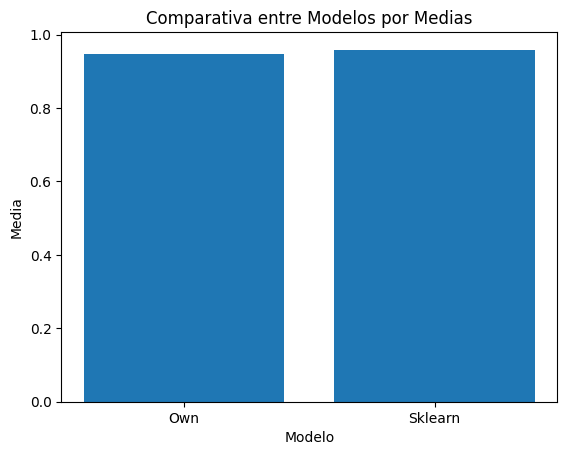

In [157]:
# Visualize metrics by mean

# Group by model
group_models = df_acum.groupby("Model")

# get mean models
means = group_models["mean"].mean()

# Graphic
plt.bar(means.index, means)
plt.xlabel("Modelo")
plt.ylabel("Media")
plt.title("Comparativa entre Modelos por Medias")
plt.show()

> **Observación:**
- A partir de los valores obtenidos para la evaluación del modelo con el algoritmo de CrosValitator tanto nuestro como de Sklearn para distintos Folds se puede observar que la media obtenido del modelo SkLearn parece ser más elevada y aproximándose a 1, en principio se podría decir que su validador es más efectivo pero lo que podríamos decir es que en la mayoría de sus evaluaciones sus modelos tendían a 1 que podría entenderse como un sobreajuste del modelo, esto podría deberse a que en el caso de SKlearn no se aplicó una mezcla de los datos, lo que si se lo realiza en nuestro validador.

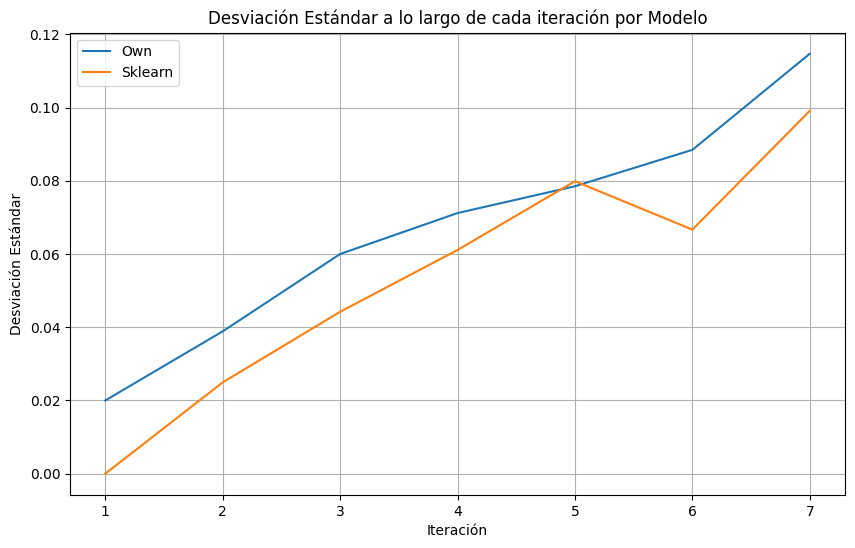

In [177]:
# Create a timeline graph
plt.figure(figsize=(10, 6))

# Iterate over unique models
for model in df_acum['Model'].unique():
    model_data = df_acum[df_acum['Model'] == model]
    plt.plot(model_data['iteration'], model_data['std'], label=model)

# Render Graph
plt.title('Desviación Estándar a lo largo de cada iteración por Modelo')
plt.xlabel('Iteración')
plt.ylabel('Desviación Estándar')
plt.legend()
plt.grid(True)
plt.show()

> **Observación:**
- Mediante este gráfico podemos ver la evolución de los validadores conforme se fueron aumentando los Folds para cada uno de ellos, como podemos notar nuestro modelo tiene a seguir una desviación más equilibrada conforme avanza en las iteraciones de cada grupo de FOLDs, a diferencia del de SKlearn que en un momento varia que podría decir que tuvo algún entrenamiento con valores muy alejados del promedio.

# 2. Grid Search